In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys
import seaborn as sns
import missingno as msno
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import pearsonr




In [ ]:
trab = pd.read_csv("datasets_consolidados/merged.csv")
trab.describe()

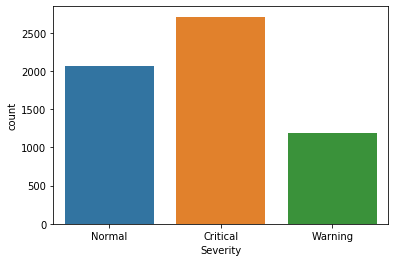

In [4]:
Severity = sns.countplot(trab['Severity'])


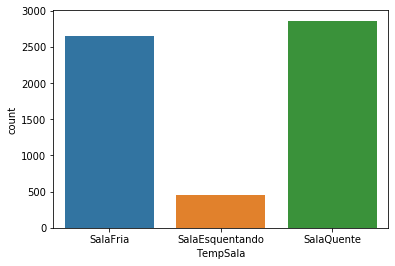

In [5]:
TempSala = sns.countplot(trab['TempSala'])

In [17]:
trab.loc[trab['Severity'] == 'Normal', 'SeverityCat'] = 1 
trab.loc[trab['Severity'] == 'Warning', 'SeverityCat'] = 2
trab.loc[trab['Severity'] == 'Critical', 'SeverityCat'] = 3

trab.loc[trab['TempSala'] == 'SalaFria', 'TempSalaCat'] = 1 
trab.loc[trab['TempSala'] == 'SalaEsquentando', 'TempSalaCat'] = 2
trab.loc[trab['TempSala'] == 'SalaQuente', 'TempSalaCat'] = 3


In [18]:
trab

,Server,Severity,Date,Description,DateOnly,Average_min,Average_max,Average_mean,Average_median,Average_var,...,Peak_mean,Peak_median,Peak_var,Peak_std,TempSala,Severity_Critical,Severity_Normal,Severity_Warning,SeverityCat,TempSalaCat
0,server01,Normal,2013-12-20 20:15:46,Log cleared.,2013-12-20,21,21,21.000000,21.0,NaN,...,22.000000,22.0,NaN,NaN,SalaFria,0,1,0,1.0,1.0
1,server01,Critical,2014-04-01 22:16:12,Power supply redundancy is lost.,2014-04-01,19,27,23.000000,23.0,32.000000,...,30.000000,30.0,0.000000,0.000000,SalaEsquentando,1,0,0,3.0,2.0
2,server01,Critical,2014-04-01 22:16:17,The power input for power supply 2 is lost.,2014-04-01,19,27,23.000000,23.0,32.000000,...,30.000000,30.0,0.000000,0.000000,SalaEsquentando,1,0,0,3.0,2.0
3,server01,Critical,2014-04-07 21:24:24,The power input for power supply 2 is lost.,2014-04-07,17,28,25.142857,26.0,10.728571,...,31.714286,34.0,21.414286,4.627557,SalaQuente,1,0,0,3.0,3.0
4,server01,Critical,2014-04-07 21:24:29,Power supply redundancy is lost.,2014-04-07,17,28,25.142857,26.0,10.728571,...,31.714286,34.0,21.414286,4.627557,SalaQuente,1,0,0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,server30,Critical,2019-05-21 13:35:57,Power supply redundancy is lost.,2019-05-21,20,25,21.250000,21.0,1.152174,...,22.666667,22.0,1.536232,1.239448,SalaFria,1,0,0,3.0,1.0
5959,server30,Normal,2019-05-21 20:05:01,The input power for power supply 2 has been re...,2019-05-21,20,25,21.250000,21.0,1.152174,...,22.666667,22.0,1.536232,1.239448,SalaFria,0,1,0,1.0,1.0
5960,server30,Normal,2019-05-21 20:05:07,The power supplies are redundant.,2019-05-21,20,25,21.250000,21.0,1.152174,...,22.666667,22.0,1.536232,1.239448,SalaFria,0,1,0,1.0,1.0
5961,server30,Critical,2019-07-28 06:42:53,The power input for power supply 1 is lost.,2019-07-28,18,22,20.000000,20.0,1.200000,...,22.312500,22.0,5.162500,2.272114,SalaEsquentando,1,0,0,3.0,2.0


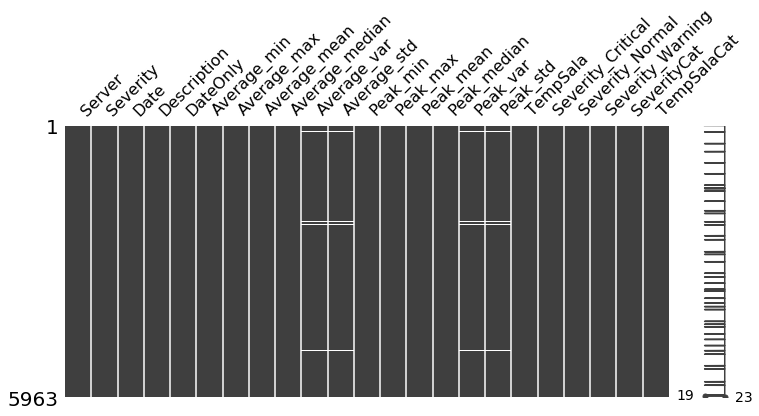

In [19]:
msno.matrix(trab,figsize=(12,5))

In [20]:
print(trab.count())

Server               5963
Severity             5963
Date                 5963
Description          5963
DateOnly             5963
Average_min          5963
Average_max          5963
Average_mean         5963
Average_median       5963
Average_var          5862
Average_std          5862
Peak_min             5963
Peak_max             5963
Peak_mean            5963
Peak_median          5963
Peak_var             5862
Peak_std             5862
TempSala             5963
Severity_Critical    5963
Severity_Normal      5963
Severity_Warning     5963
SeverityCat          5963
TempSalaCat          5963
dtype: int64


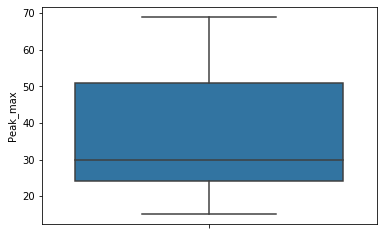

In [21]:
sns.boxplot(data=trab,x="Peak_max",orient="v")

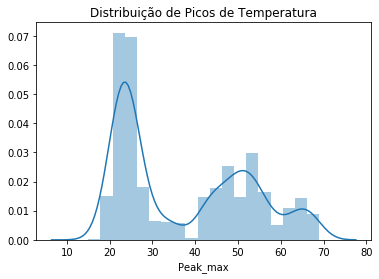

In [22]:
PicosTemp = sns.distplot(trab['Peak_max'])
plt.title("Distribuição de Picos de Temperatura")
plt.show(PicosTemp)

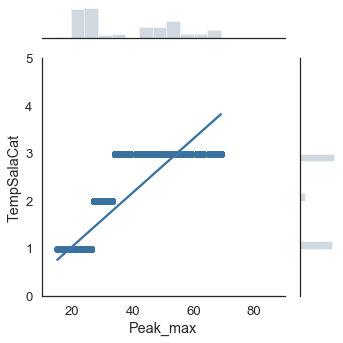

In [27]:
sns.set(style='white', font_scale=1.2)

g = sns.JointGrid(data=trab, x='Peak_max', y='TempSalaCat', xlim=(10, 90), ylim=(0, 5), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
plt.tight_layout()


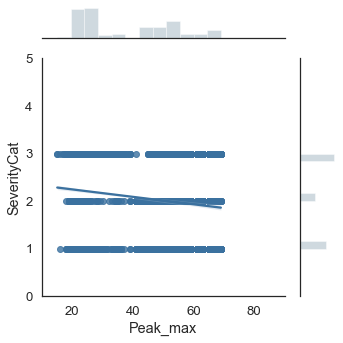

In [28]:
sns.set(style='white', font_scale=1.2)

g = sns.JointGrid(data=trab, x='Peak_max', y='SeverityCat', xlim=(10, 90), ylim=(0, 5), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
plt.tight_layout()


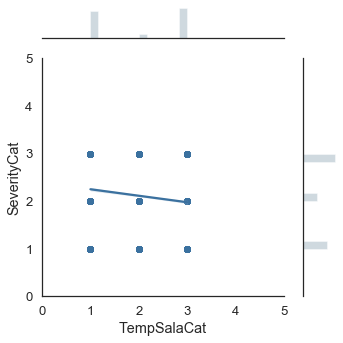

In [31]:
sns.set(style='white', font_scale=1.2)

g = sns.JointGrid(data=trab, x='TempSalaCat', y='SeverityCat', xlim=(0, 5), ylim=(0, 5), height=5)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
plt.tight_layout()


In [44]:
# Calculate the Pearson correlation between Peak_max and SeverityCat and TempSalacat
corr = pg.pairwise_corr(trab, columns=[['Peak_max'], ['SeverityCat', 'TempSalaCat']], method='pearson')
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
1,Peak_max,TempSalaCat,5963,0.906440,0.000000e+00
0,Peak_max,SeverityCat,5963,-0.135218,9.850976e-26


In [45]:
trab.rcorr(stars=False)

,Average_min,Average_max,Average_mean,Average_median,Average_var,Average_std,Peak_min,Peak_max,Peak_mean,Peak_median,Peak_var,Peak_std,Severity_Critical,Severity_Normal,Severity_Warning,SeverityCat,TempSalaCat
Average_min,-,0.000,0.,0.,0.000,0.000,0.,0.044,0.,0.,0.000,0.000,0.369,0.012,0.000,0.404,0.067
Average_max,0.067,-,0.,0.000,0.,0.,0.000,0.,0.,0.000,0.,0.,0.000,0.577,0.000,0.000,0.
Average_mean,0.721,0.561,-,0.,0.,0.000,0.,0.000,0.,0.,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Average_median,0.678,0.216,0.873,-,0.000,0.000,0.,0.000,0.,0.,0.000,0.000,0.000,0.000,0.013,0.000,0.000
Average_var,-0.119,0.838,0.492,0.166,-,0.,0.000,0.,0.,0.000,0.,0.,0.000,0.235,0.000,0.000,0.
Average_std,-0.162,0.935,0.463,0.157,0.942,-,0.000,0.,0.,0.000,0.,0.,0.000,0.556,0.000,0.000,0.
Peak_min,0.936,0.137,0.722,0.66,-0.061,-0.075,-,0.000,0.,0.,0.000,0.000,0.572,0.772,0.719,0.637,0.000
Peak_max,-0.026,0.975,0.453,0.123,0.777,0.911,0.057,-,0.,0.000,0.,0.,0.000,0.673,0.000,0.000,0.
Peak_mean,0.572,0.71,0.955,0.772,0.628,0.637,0.643,0.629,-,0.,0.,0.,0.000,0.045,0.000,0.000,0.
Peak_median,0.605,0.231,0.838,0.97,0.191,0.201,0.644,0.151,0.792,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [46]:
trab[['Peak_max', 'SeverityCat', 'TempSalaCat']].rcorr()

,Peak_max,SeverityCat,TempSalaCat
Peak_max,-,***,***
SeverityCat,-0.135,-,***
TempSalaCat,0.906,-0.148,-


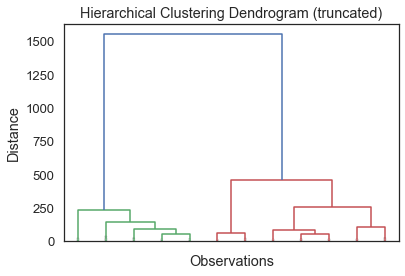

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
data_NumberClusters = trab[['Peak_max', 'SeverityCat', 'TempSalaCat']]
data = linkage(data_NumberClusters, 'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(
data,
truncate_mode='lastp',
p=12,
show_leaf_counts=False,
leaf_rotation=90.,
leaf_font_size=12.,
show_contracted=True,)
plt.show()
